![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

                                         school_name  ... percent_tested
0  New Explorations into Science, Technology and ...  ...            NaN
1                               Essex Street Academy  ...           78.9
2                       Lower Manhattan Arts Academy  ...           65.1
3    High School for Dual Language and Asian Studies  ...           95.9
4      Henry Street School for International Studies  ...           59.7

[5 rows x 7 columns]
(375, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float

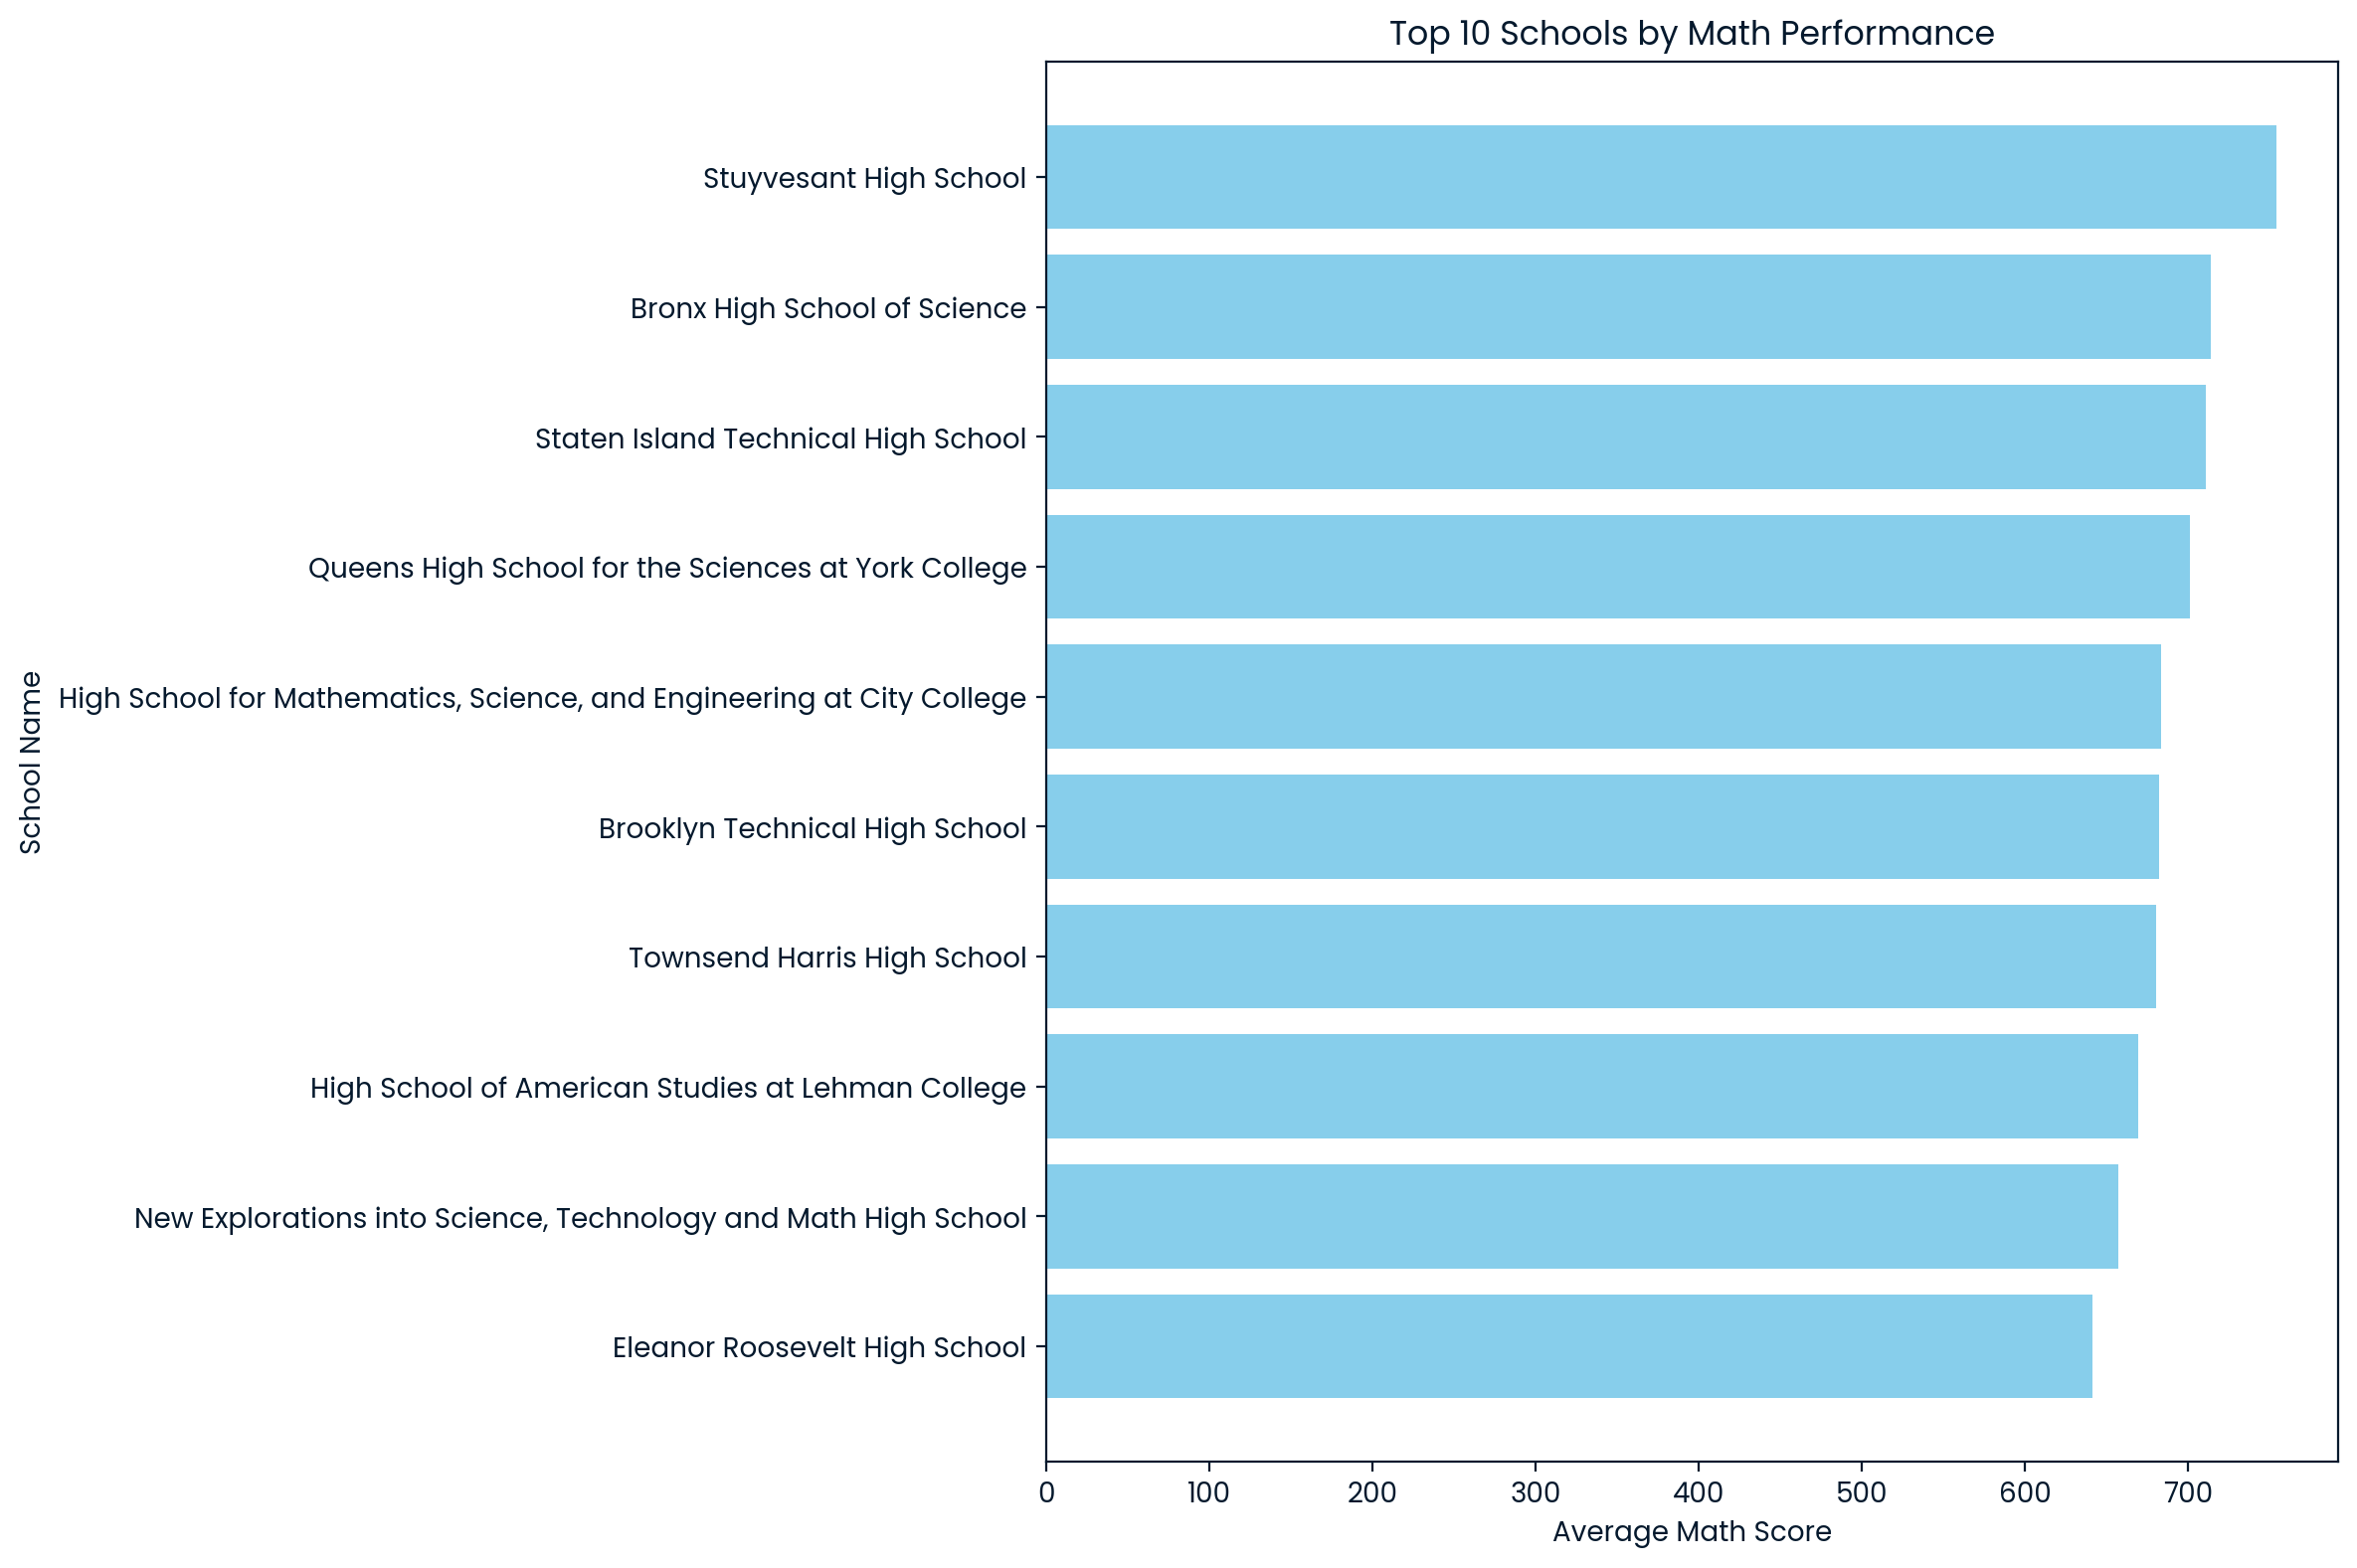

                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


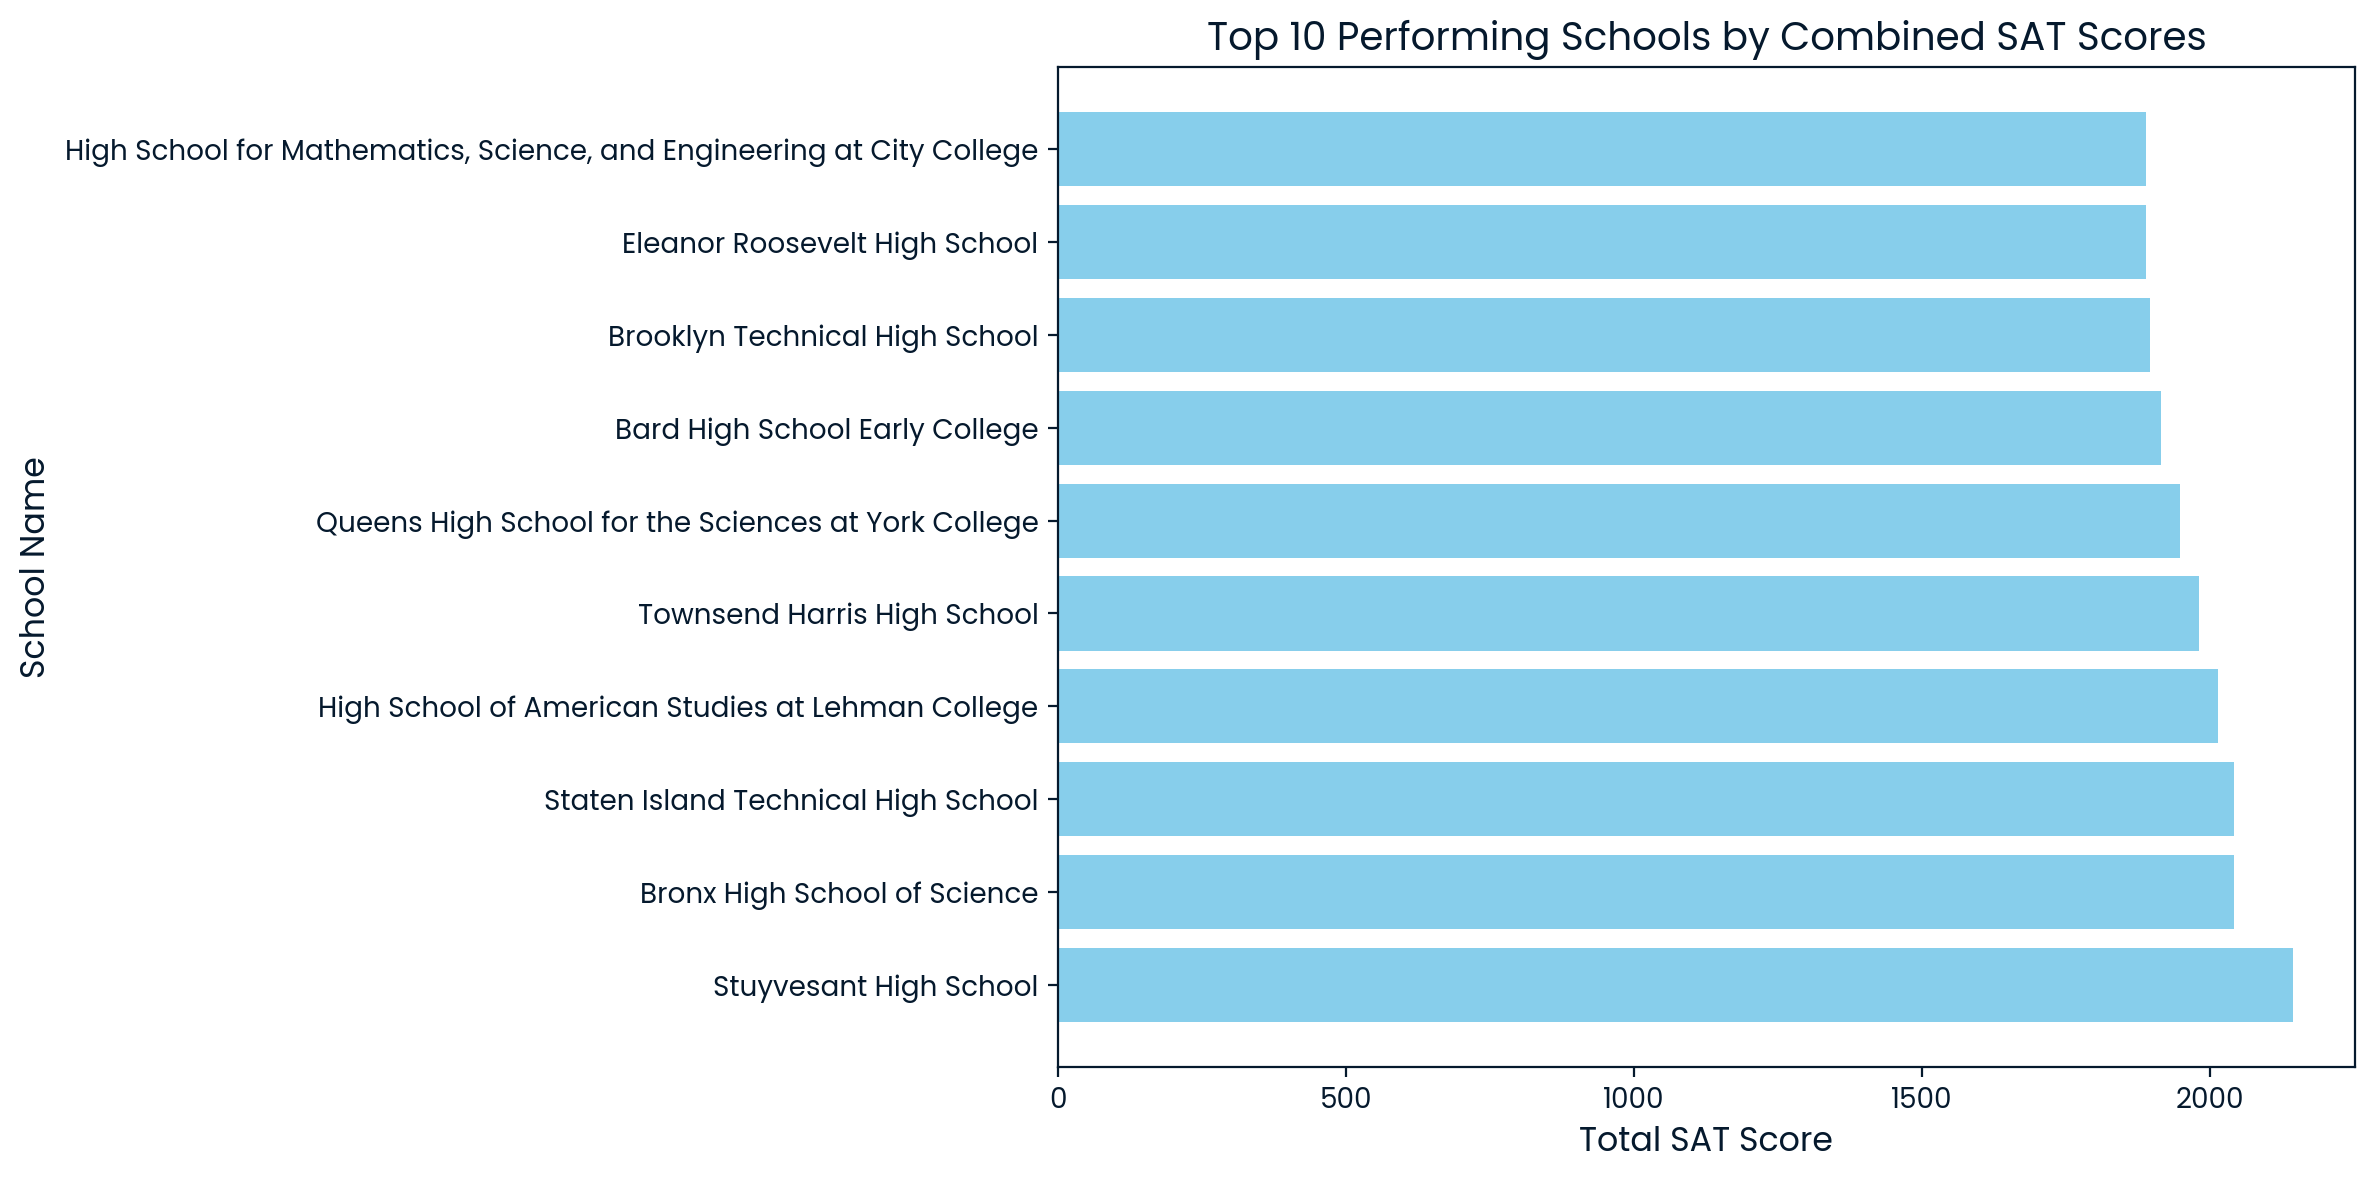

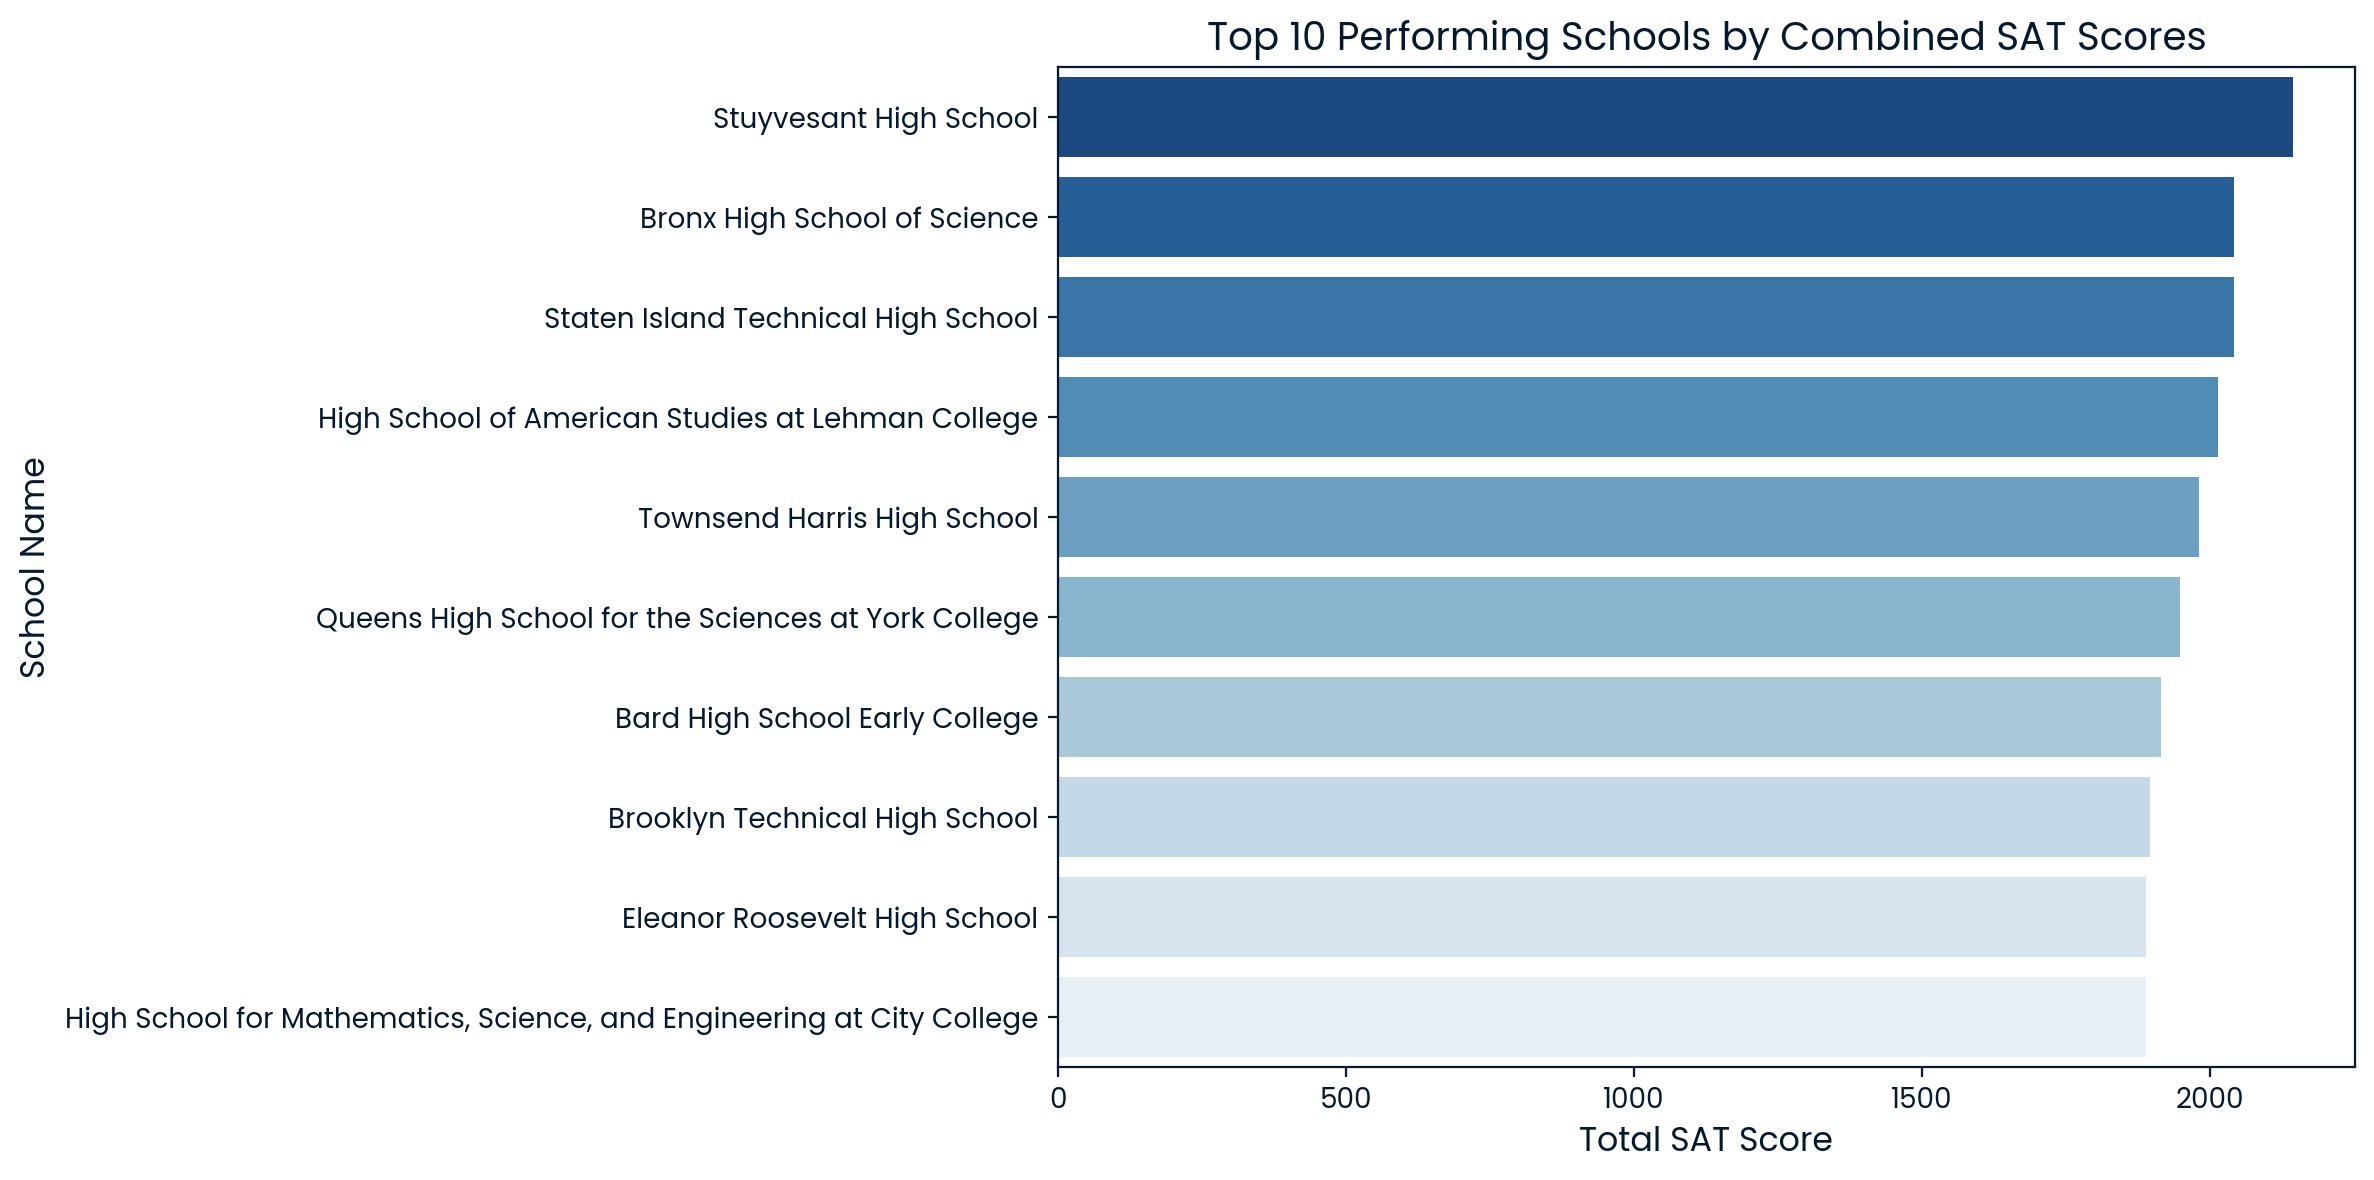

     borough  num_schools  average_SAT  std_SAT
2  Manhattan           89      1340.13   230.29


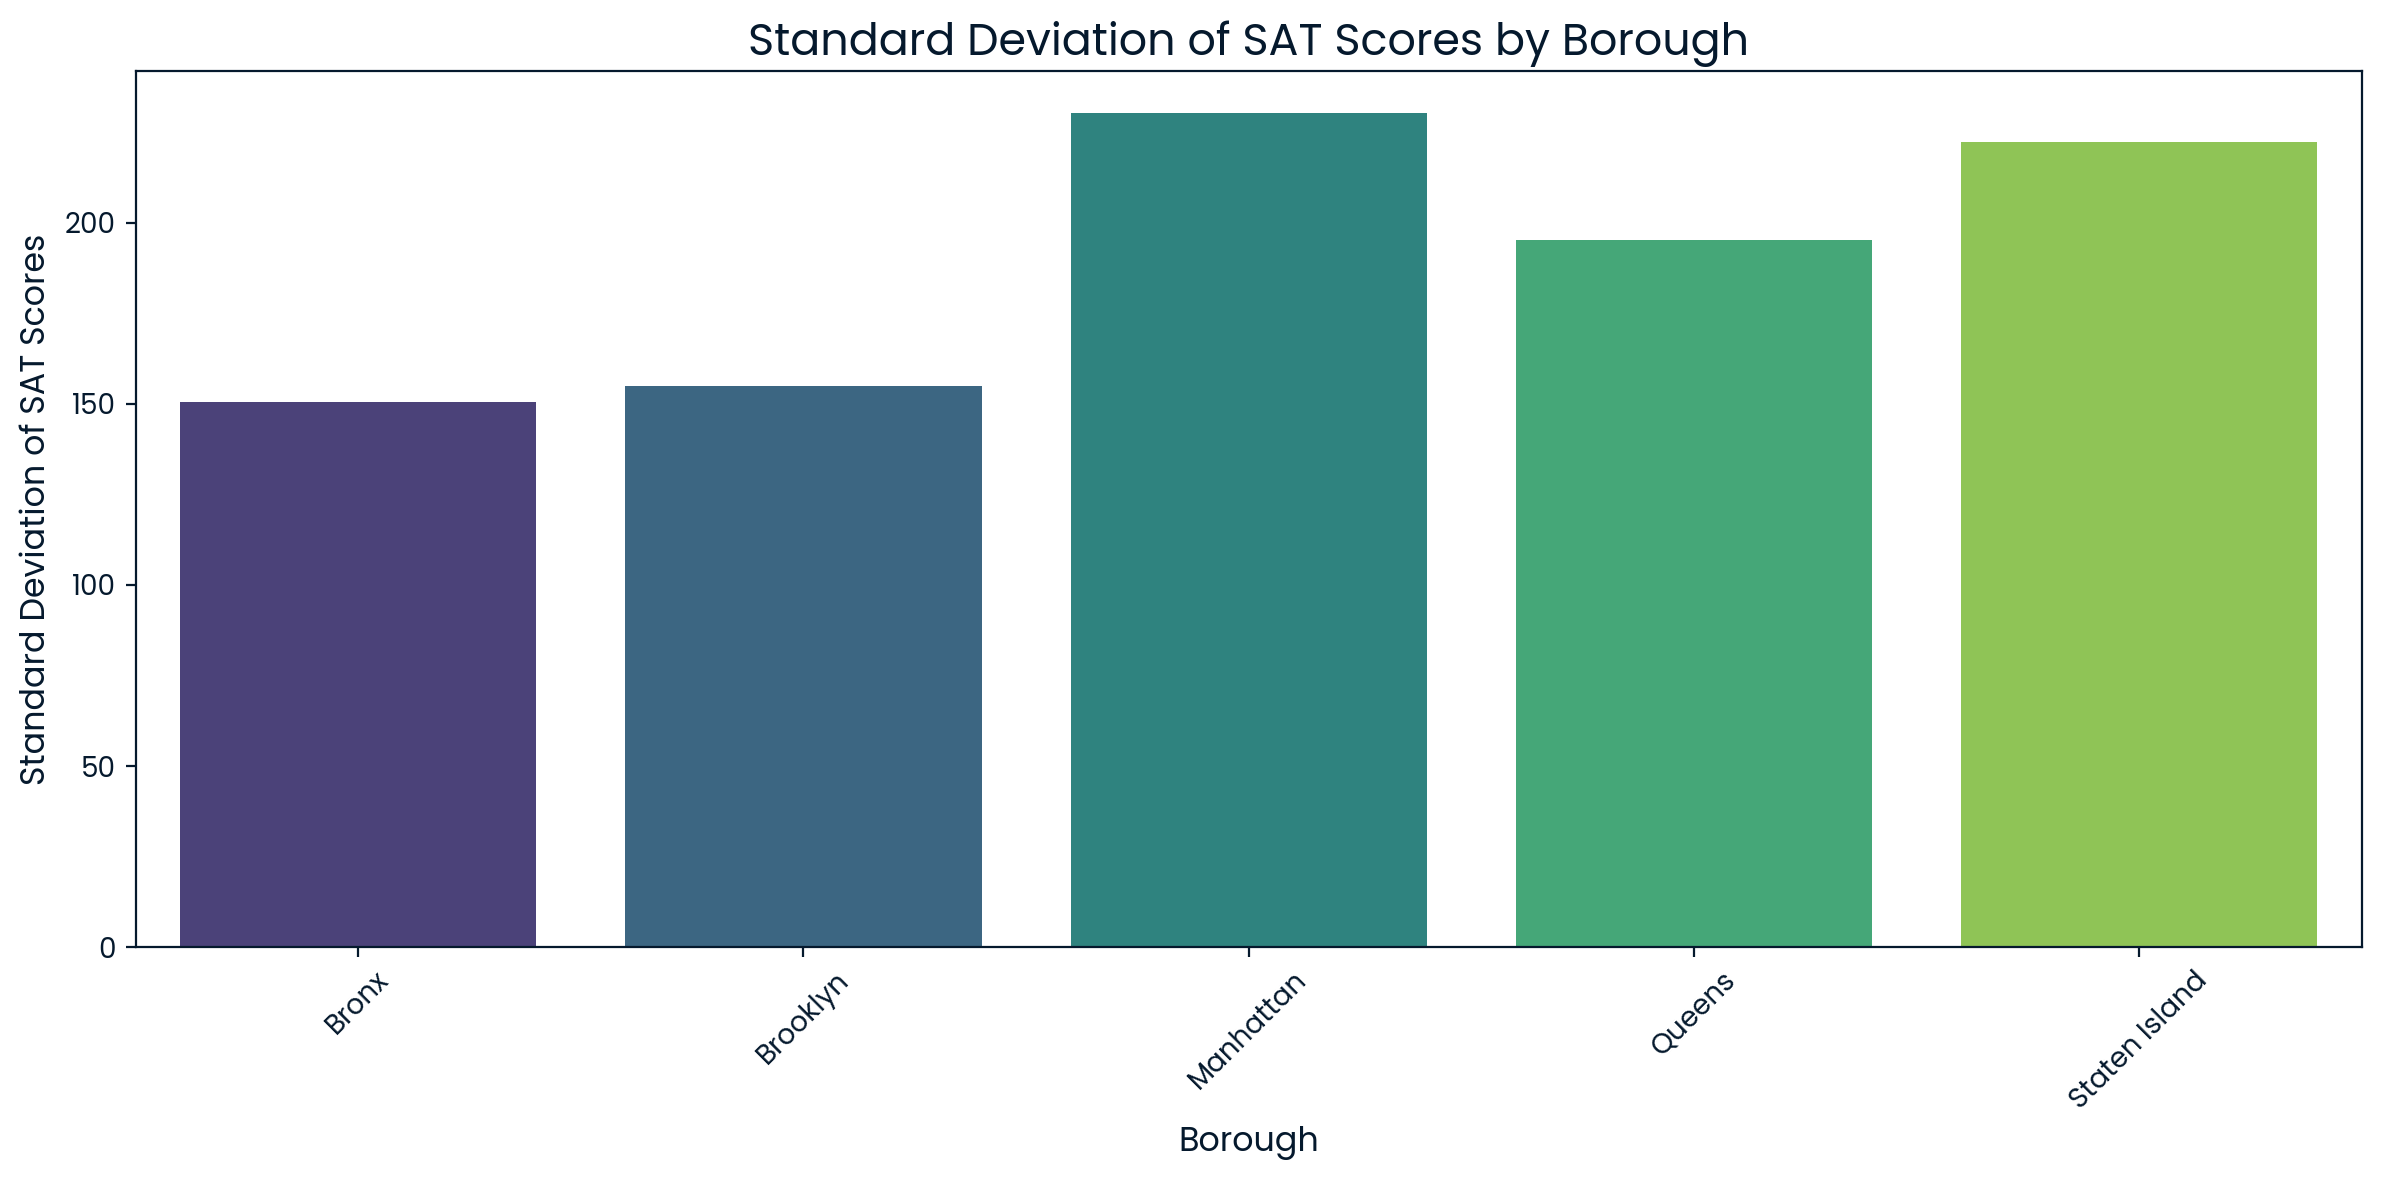

There are 5 boroughs in the dataset.
Boroughs: ['Manhattan' 'Staten Island' 'Bronx' 'Queens' 'Brooklyn']


In [1]:
# Re-run this cell 
import pandas as pd

# Read in the data
schools = pd.read_csv("schools.csv")

# Make a copy of the data to preserve the original dataset
schools_copy = schools.copy()

# Preview the data
print(schools_copy.head())
print(schools_copy.shape)
print(schools_copy.info())
print(schools_copy.duplicated().sum())
print(schools_copy.isnull().sum())

# Question 1: Which NYC schools have the best math results? 
# Objective process
# 1. Define threshold for "best" math results
# Ranges of score 0 and 800 (max possible score)
# "best" math score threshold = 80%
# 80% of 800 = 0.8×800 = 640

math_threshold = 0.8 * 800

# 2. Create a new dataframe for NYC schools that have the best math results.
# Filter schools with this boolean condition: average_math column >= math_threshold which is 640
# Filter out the dataframe with only the rows where the condition is satisfied: schools_copy[condition]

best_math_schools = schools_copy[schools_copy['average_math'] >= math_threshold]

# Sort by 'average_math' in descending order after filtering
best_math_schools_sorted = best_math_schools.sort_values(by='average_math', ascending=False)

# Select only the relevant columns: "school_name" and "average_math"
best_math_schools = best_math_schools_sorted[['school_name', 'average_math']]

# Display the result
print(best_math_schools_sorted)

# 3. Sort the values of average_math column in the created dataframe = best_math_schools, from highest to lowest (descending order)
best_math_schools_sorted = best_math_schools.sort_values(by='average_math', ascending=False)
print(best_math_schools_sorted)

# 4. After sorting, extract the top 10
top_10_math_schools = best_math_schools_sorted.head(10)
print(top_10_math_schools)

# 5. Visualize the data
# Create bar chart for the top_10_math_schools
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.barh(top_10_math_schools['school_name'], top_10_math_schools['average_math'], color='skyblue')

# Add labels and title
plt.xlabel('Average Math Score')
plt.ylabel('School Name')
plt.title('Top 10 Schools by Math Performance')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest scores at the top
plt.tight_layout()

# Show the chart
plt.show()

# 6. Insights
# "The top-performing school in math is Stuyvesant High School, with an average math score of 780. 
# The difference between the top school and the 10th-ranked school is 30 points, showing a relatively close competition among the best."


# Question 2: What are the top 10 performing schools based on the combined SAT scores?

# Objective process
#1. Create a new column 'Total_SAT' to the dataframe with the calculated total SAT score for each school (Pandas) 
# combined_score = average_math + average_reading + average_writing
schools_copy['total_SAT'] = schools_copy['average_math'] + schools_copy['average_reading'] + schools_copy['average_writing']

#2. Sort the dataframe by 'total_SAT' in descending order
top_schools_sorted = schools_copy.sort_values(by='total_SAT', ascending=False)

#3. Select the top 10 schools and include only the 'school_name' and 'total_SAT' columns
    # Display the result
top_10_schools = top_schools_sorted[['school_name', 'total_SAT']].head(10)
print(top_10_schools)

#5 Visualize the results
    # Visualization: Bar chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.barh(top_10_schools['school_name'], top_10_schools['total_SAT'], color='skyblue')
plt.xlabel('Total SAT Score', fontsize=12)
plt.ylabel('School Name', fontsize=12)
plt.title('Top 10 Performing Schools by Combined SAT Scores', fontsize=14)
plt.tight_layout()
plt.show()

    # Visualization: Bar chart using Seaborn

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(
    x='total_SAT', 
    y='school_name', 
    data=top_10_schools, 
    palette='Blues_r'
)

# Add chart labels and title
plt.xlabel('Total SAT Score', fontsize=12)
plt.ylabel('School Name', fontsize=12)
plt.title('Top 10 Performing Schools by Combined SAT Scores', fontsize=14)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Question 3: Which single borough has the largest standard deviation in the combined SAT score?

# Step 1: Group data by 'borough' and calculate required statistics
borough_stats = schools_copy.groupby('borough')['total_SAT'].agg(
    std_SAT='std',       # Standard deviation of total_SAT
    average_SAT='mean',  # Mean of total_SAT
    num_schools='count'  # Count of schools in each borough
).reset_index()

# Round all numeric values to two decimal places
borough_stats = borough_stats.round(2)

# Find the borough with the largest standard deviation
largest_std_dev = borough_stats[borough_stats['std_SAT'] == borough_stats['std_SAT'].max()]

# Ensure the DataFrame contains only the required columns
largest_std_dev = largest_std_dev[['borough', 'num_schools', 'average_SAT', 'std_SAT']]

# Display the result
print(largest_std_dev)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot standard deviation of total_SAT across boroughs
plt.figure(figsize=(12, 6))
sns.barplot(x='borough', y='std_SAT', data=borough_stats, palette='viridis')

# Customize the chart
plt.title('Standard Deviation of SAT Scores by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Standard Deviation of SAT Scores', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

unique_boroughs = schools_copy['borough'].unique()

# Display the number of unique boroughs
print(f"There are {len(unique_boroughs)} boroughs in the dataset.")

# Display the list of boroughs
print("Boroughs:", unique_boroughs)

schools.to_csv('school.csv', index=False)